<a href="https://colab.research.google.com/github/Ryansyaaw/Machine-Learning_2023/blob/main/kuis%202/kuis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install Tesseract OCR
!sudo apt install tesseract-ocr-ind

# Install library pytesseract
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 23 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (6,481 kB/s)
debconf: unable to ini

In [10]:

import cv2
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

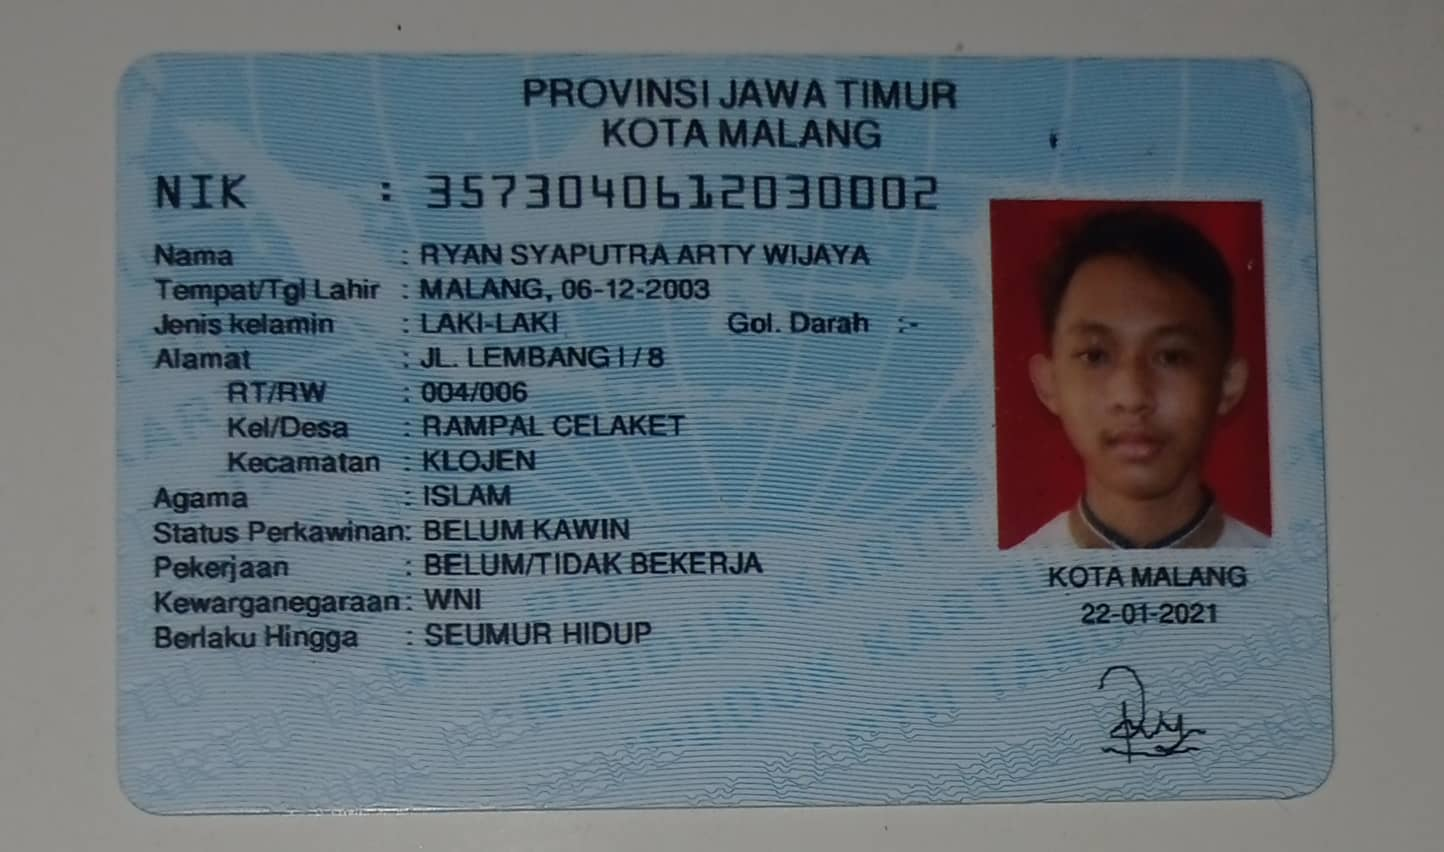

In [13]:
ktp = cv2.imread("/content/drive/MyDrive/ML_Kuis_Dataset/ktpryan.jpg")

cv2_imshow(ktp)
img = cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB)

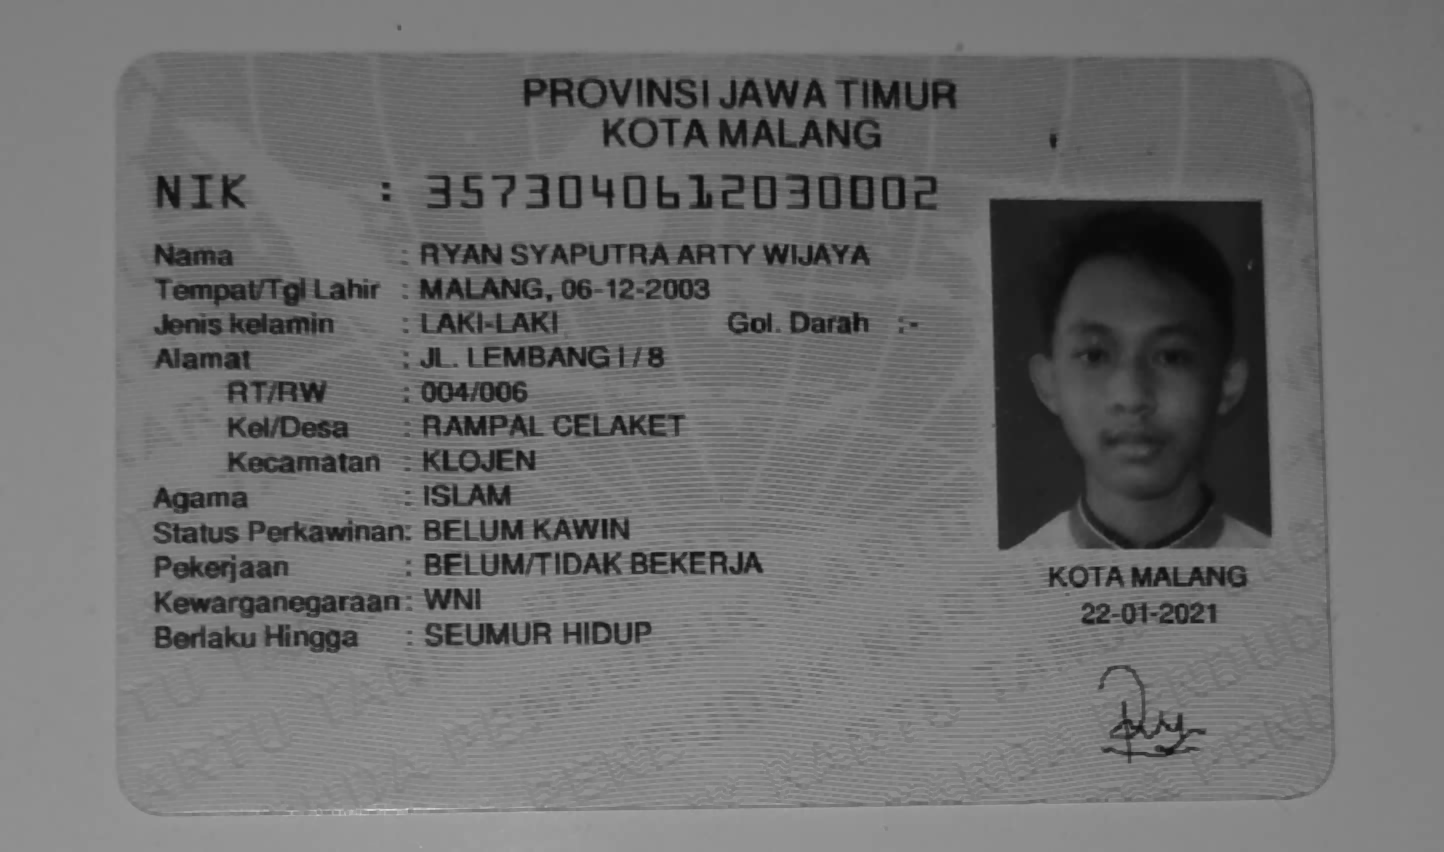

NIK Text: PROVINSI JAWA TIMUR )
KOTA MALANG = |
NIK >: 3573040b12e03000e2
Nama - RYAN SYAPUTRA ARTY WIJAYA i
Tempat/TgiLahir - MALANG, 06-12-2003 ;
Jenis kelamin __- LAKI-LAK! Gol. Darah =~
Alamat : JL. LEMBANG1/8 |
ATAW : 004/006 =
Kel/Desa___ = RAMPAL CELAKET
Kecamatan = KLOJEN
Agama = ISLAM
Status Perkawinan: BELUM KAWIN \
Pekerjaan : BELUM/TIDAK BEKERJA KOTA MALANG
Kewarganegaraan: WNI 22-04-2021
BerlakuHingga - SEUMUR HIDUP
rs



In [39]:
# Pengaburan (Blurring)
blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Praproses morfologi (closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_nik = cv2.morphologyEx(gray_nik, cv2.MORPH_CLOSE, kernel)

# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6'
nik_text = pytesseract.image_to_string(morphed_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK

cv2_imshow(morphed_nik)

print("NIK Text:", nik_text)

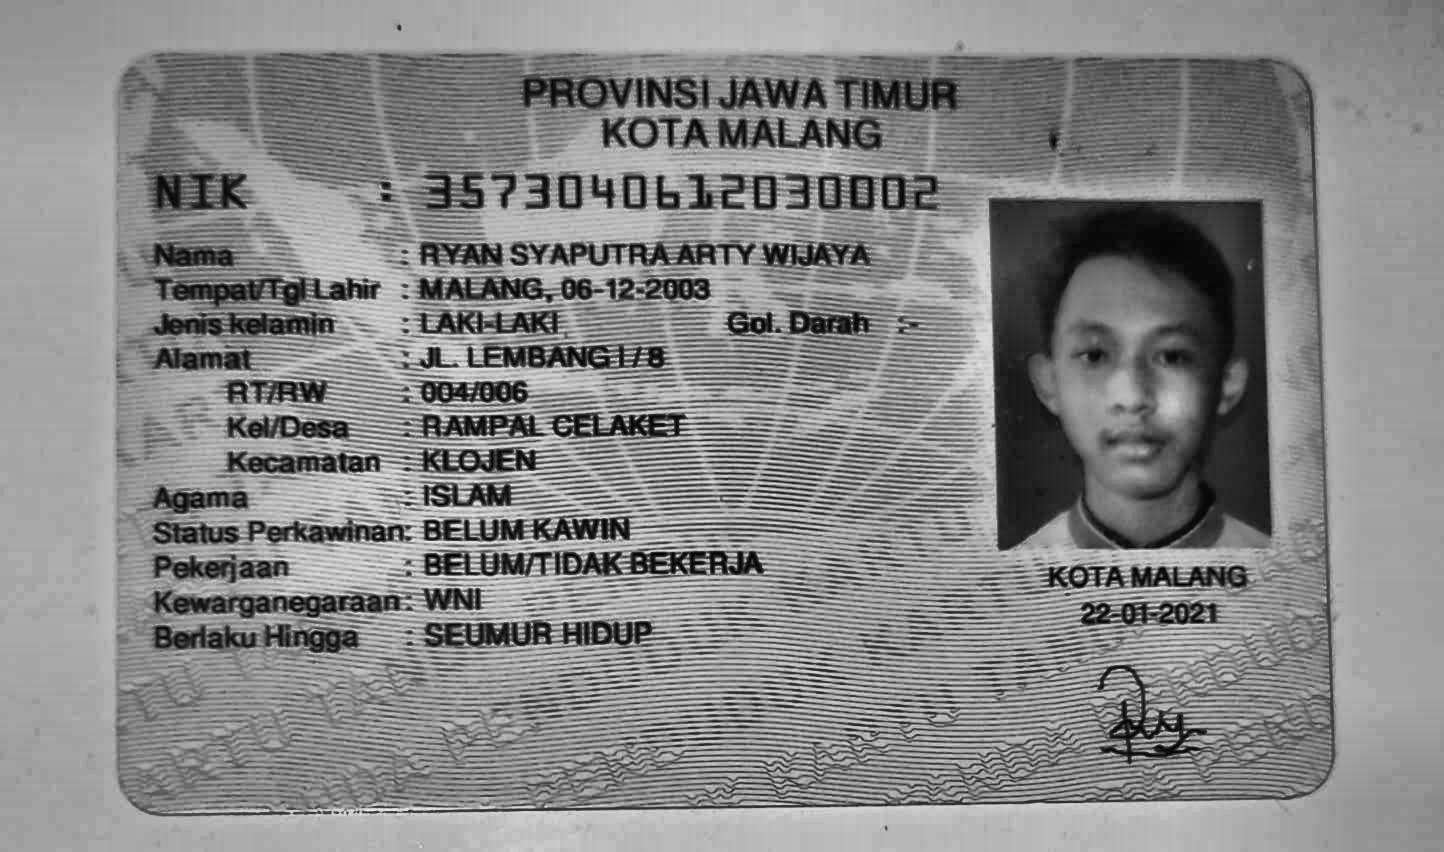

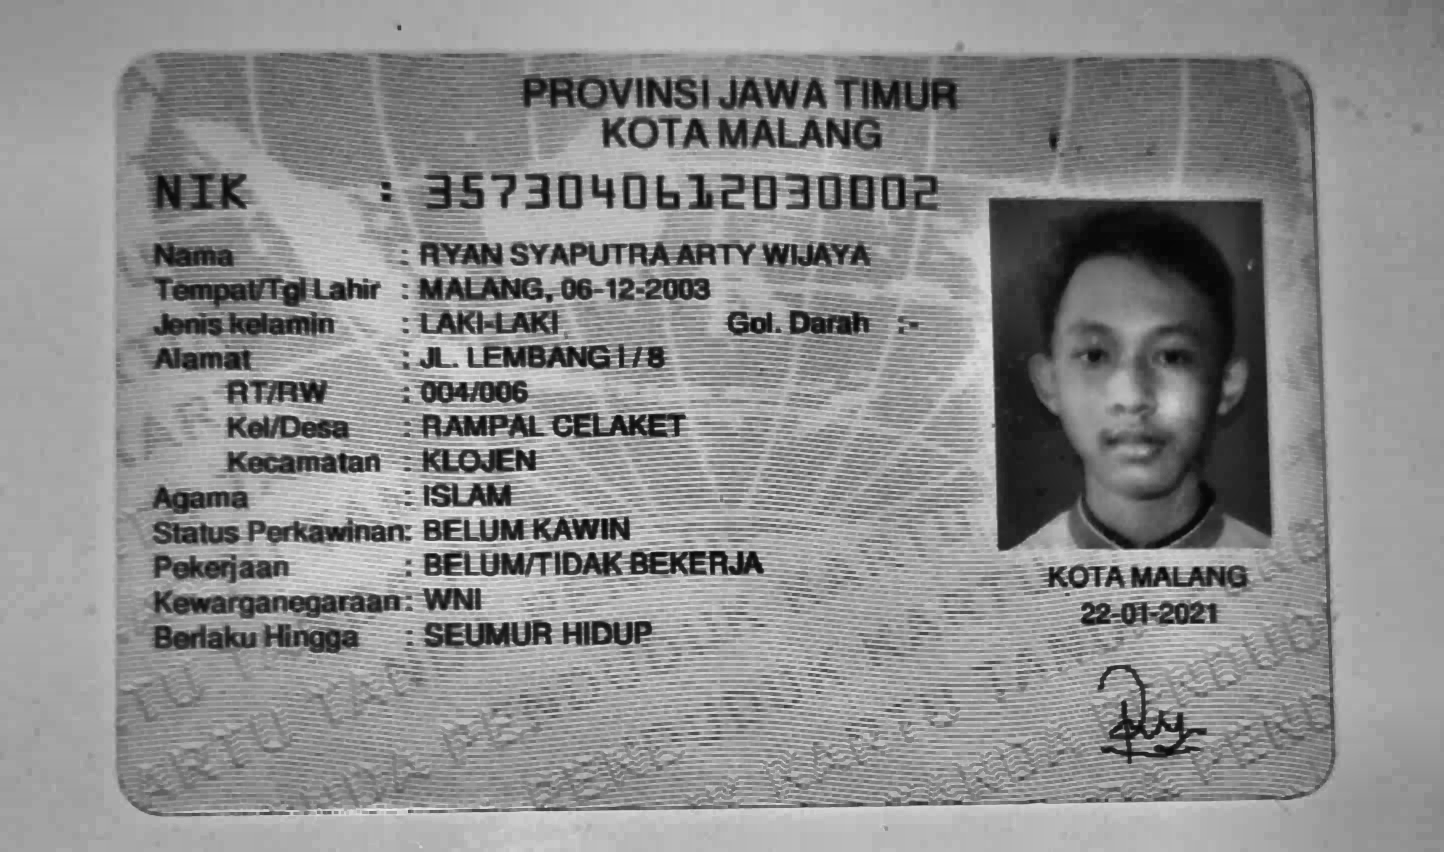

SS SSS SS SS Sas =
5 Provinsi swat
“NIK ~~ = 357304064203 0002 pes |
Nama : RYAN SYAPUTRAARTY WIJAYA
~Tempatfgilahir - MALANG, 06-12-2003 —— :
| Alamat > JL. LEMBANG3= .

E RVRW 004/006 ———————— “ ;
= Kecamatan —KLOJEN == SSS
Agama SSS SSS SSS
Status Perkawinan: BELUM KAWIN === == = el _
Pekerjaan : BELUM/TIDAKBEKERJA = —- "x o7,MaLANG —
Kewarganegaraan: WNI - —___SSSSS=a=a ————
BerlakuHinggs :SEUMURHIDUP == Se nae
SSS 08S SSS SSS Eee



In [32]:
blurred = cv2.GaussianBlur(ktp,(5,5), 0.5)

# Konversi gambar ke dalam format grayscale
gray_nik = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Contoh praproses: peningkatan kontras
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
preprocessed_nik = clahe.apply(gray_nik)

# # Praproses segmentasi teks menggunakan threshold dinamis
# _, threshold_nik = cv2.threshold(preprocessed_nik, 0, 255, cv2.THRESH_BINARY
#                                  + cv2.THRESH_OTSU)

# Praproses morfologi (closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed_nik = cv2.morphologyEx(preprocessed_nik, cv2.MORPH_CLOSE, kernel)


# Contoh segmentasi teks menggunakan pytesseract
custom_config = r'--oem 3 --psm 6'
nik_text = pytesseract.image_to_string(morphed_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
cv2_imshow(preprocessed_nik)
# cv2_imshow(threshold_nik)
cv2_imshow(morphed_nik)
print(nik_text)